## Wavelet convolution for narrowband filtering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

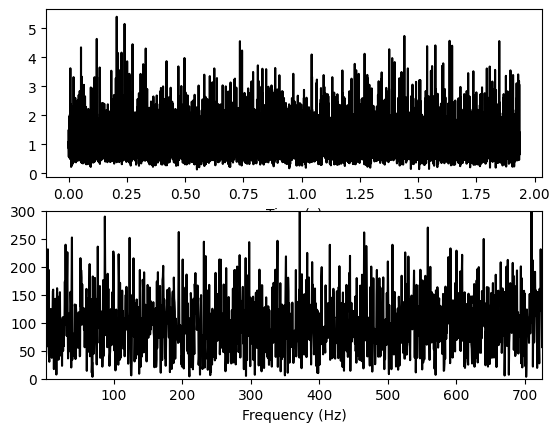

In [2]:
# simulation parameters
srate = 4352 # hz
npnts = 8425
time  = np.arange(0,npnts)/srate
hz    = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))

# pure noise signal
signal1 = np.exp( .5*np.random.randn(npnts) )

# let's see what it looks like
plt.subplot(211)
plt.plot(time,signal1,'k')
plt.xlabel('Time (s)')

# in the frequency domain
signalX = 2*np.abs(scipy.fftpack.fft(signal1))
plt.subplot(212)
plt.plot(hz,signalX[:len(hz)],'k')
plt.xlim([1,srate/6])
plt.ylim([0,300])
plt.xlabel('Frequency (Hz)')
plt.show()


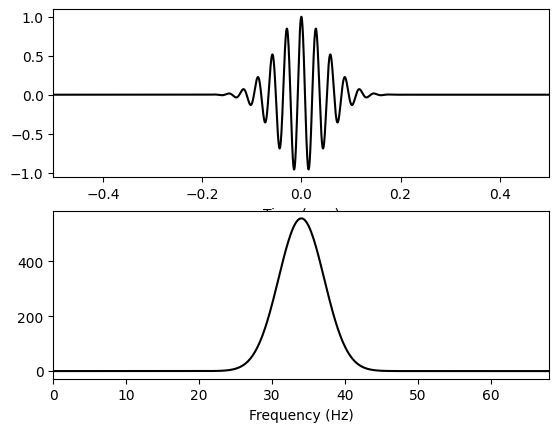

In [3]:
## create and inspect the Morlet wavelet

# wavelet parameters
ffreq = 34  # filter frequency in Hz
fwhm  = .12 # full-width at half-maximum in seconds
wavtime = np.arange(-3,3,1/srate) # wavelet time vector (same sampling rate as signal!)

# create the wavelet
morwav = np.cos(2*np.pi*ffreq*wavtime) * np.exp( -(4*np.log(2)*wavtime**2) / fwhm**2 )


# amplitude spectrum of wavelet
# (note that the wavelet needs its own hz because different length)
wavehz  = np.linspace(0,srate/2,int(np.floor(len(wavtime)/2)+1))
morwavX = 2*np.abs(scipy.fftpack.fft(morwav))


# plot it!
plt.subplot(211)
plt.plot(wavtime,morwav,'k')
plt.xlim([-.5,.5])
plt.xlabel('Time (sec.)')

plt.subplot(212)
plt.plot(wavehz,morwavX[:len(wavehz)],'k')
plt.xlim([0,ffreq*2])
plt.xlabel('Frequency (Hz)')
plt.show()

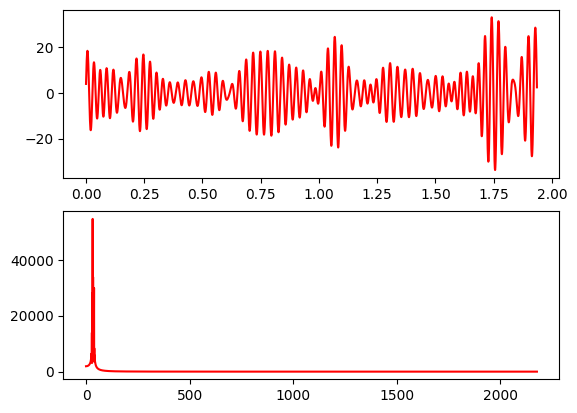

In [4]:
## now for convolution

convres = scipy.signal.convolve(signal1,morwav,'same')

# show in the time domain
plt.subplot(211)
plt.plot(time,convres,'r')

# and in the frequency domain
plt.subplot(212)
convresX = 2*np.abs(scipy.fftpack.fft(convres))
plt.plot(hz,convresX[:len(hz)],'r')
plt.show()
### Time-domain wavelet normalization is... annoying and difficult.
### Let's do it in the frequency domain

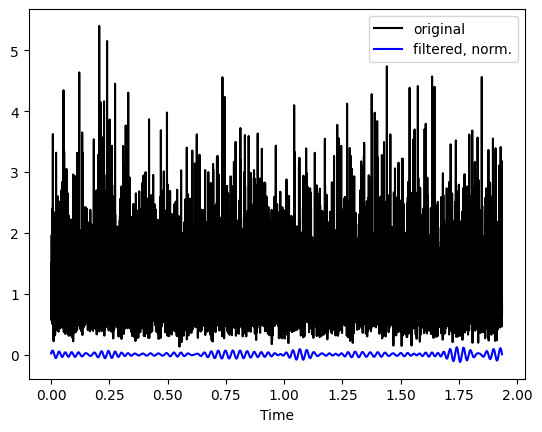

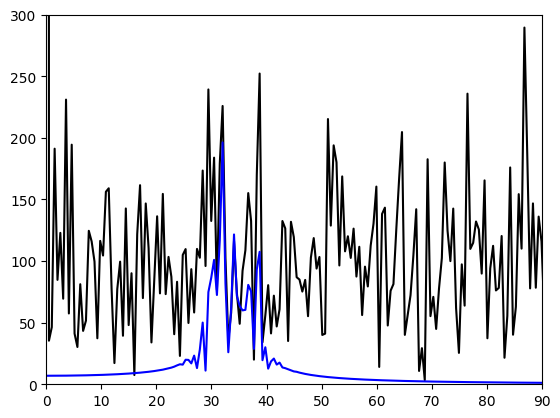

In [5]:
### "manual" convolution

nConv = npnts + len(wavtime) - 1
halfw = int( np.floor(len(wavtime)/2) )

# spectrum of wavelet
morwavX = scipy.fftpack.fft(morwav,nConv)

# now normalize in the frequency domain
## note: ensure we're taking the magnitude of the peak; 
#  I didn't explain this in the video but it ensures normalization by
#  the magnitude and not the complex value.
morwavX = morwavX / np.abs(np.max(morwavX))
# also equivalent:
morwavX = (np.abs(morwavX)/max(np.abs(morwavX))) * np.exp(1j*np.angle(morwavX))

# now for the rest of convolution
convres = scipy.fftpack.ifft( morwavX * scipy.fftpack.fft(signal1,nConv) )
convres = np.real( convres[halfw:-halfw+1] )


# time domain
plt.plot(time,signal1,'k',label='original')
plt.plot(time,convres,'b',label='filtered, norm.')
plt.legend()
plt.xlabel('Time')
plt.show()

# frequency domain
convresX = 2*np.abs(scipy.fftpack.fft(convres))
plt.plot(hz,signalX[:len(hz)],'k',label='original')
plt.plot(hz,convresX[:len(hz)],'b',label='filtered, norm.')
plt.ylim([0,300])
plt.xlim([0,90])
plt.show()